In [1]:
!pip install keras

In [1]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

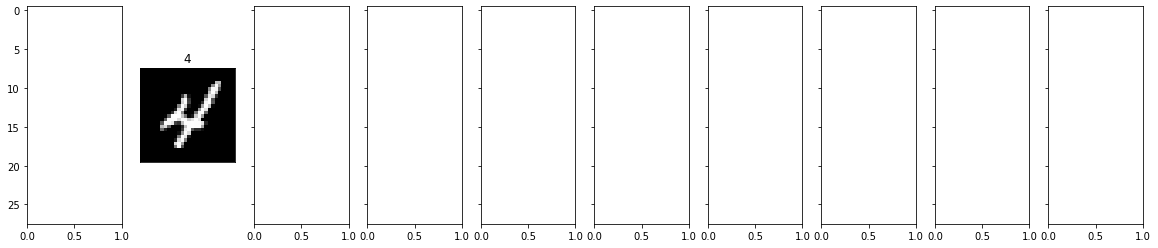

In [8]:
fig, axes = plt.subplots(ncols=10, sharex=False, 
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[1].set_title(y_train[i])
    axes[1].imshow(X_train[i], cmap='gray')
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)
plt.show()

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_test.shape

(10000, 10)

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(20,20)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 10)                4010      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 4,125
Trainable params: 4,125
Non-trainable params: 0
_________________________________________________________________


In [22]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [15]:
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [18]:
model.fit(X_train, y_train, epochs=20,
         validation_data=(X_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 20, 20), found shape=(32, 28, 28)


In [ ]:
model.save('mnist_model.h5')